In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#converts time data from 24hour code to real numbers (0 - 1) added to days.

def timeDataMath(hours,minutes):
    for i in range(0, len(hours)):
        #t = string.replace(":","")
        hours[i] = float(hours[i])
        minutes[i] = float(minutes[i])
        
    timeTranslation = []
    
    for i in range(0, len(hours)):
        
        hours[i] = hours[i] * 3600
        minutes[i] = minutes[i] * 60
        a = hours[i] + minutes[i]
        a = a / 86400
        a = round(a, 2)
        
        timeTranslation.append(a)
    
    #print(timeTranslation)
    return(timeTranslation)

In [7]:
#Column A: Day of the year
#Column B: Time in hours
#Column C: Time in minutes
#Column D: Tide Height in feet

#open raw data (edited)
with open('ASTR19_tides_data_edited.txt', "r") as f:
    lines = f.readlines()
    #print(lines)
    
    day = ([line.split(" ")[0] for line in lines])
    timeHour = ([line.split(" ")[1] for line in lines])
    timeMinute = [line.split(" ")[2] for line in lines]
    height = [line.split(" ")[3] for line in lines]
    
    for i in range(0, len(day)):
        day[i] = float(day[i])
        
    for i in range(0, len(height)):
        height[i] = float(height[i])
        

#apply time fix.
timeFixed = timeDataMath(timeHour,timeMinute)
for i in range(0, len(day)):
    day[i] = day[i] + timeFixed[i]
    day[i] = round(day[i], 2)

#print(day)
#print(timeHour)
#print(timeMinute)
#print(height)

In [8]:
#seperates high tide and low tide data.

high = []
highDay = []
low = []
lowDay = []

for i in range(0, len(height)):
    if (i % 2) == 0:
        high.append(height[i])
        highDay.append(day[i])
    else:
        low.append(height[i])
        lowDay.append(day[i])
        
#print(high)
#print(highDay)
#print(low)
#print(lowDay)

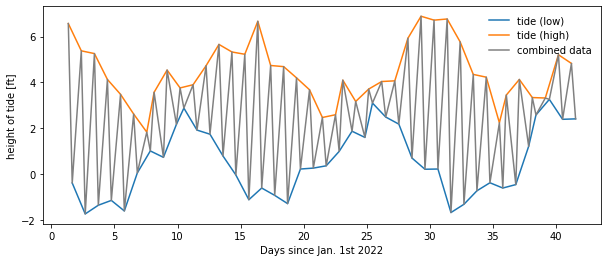

In [9]:
#plotting raw tide data.
#something screwy with dates lining up exactly. Maybe?

l = plt.figure(figsize=(10,4))
plt.plot(lowDay, low, label='tide (low)')
plt.plot(highDay, high, label='tide (high)')

plt.plot(day, height, label='combined data',color="grey")

plt.xlabel('Days since Jan. 1st 2022')
plt.ylabel('height of tide [ft]')
plt.legend(loc=1,frameon=False)


In [10]:
from scipy import optimize

In [11]:
#functions for defualt curve fit.

def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

def curveFit(x, y, y_err, paramData):

    params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err,p0=paramData)
    
    a_fit = params[0]
    b_fit = params[1]
    c_fit = params[2]
    d_fit = params[3]

    print(a_fit,b_fit,c_fit,d_fit)
    y_fit = a_fit * np.sin(b_fit*x_fit2 + c_fit) + d_fit
    
    return y_fit

Functions for updated "complex" curve fit. (NOT WORKING)

In [12]:
#functions for updated "complex" curve fit. (NOT WORKING)

def f_complexLine(x, y, a, b, c, d, e):
    e_xpand = np.full(len(height),2)
    return a * np.sin(b*(x + (y / e) + c) + d)

def complexCurveFit(x, y, y_err, paramData):

    params, params_cov = optimize.curve_fit(f_complexLine(x, y, paramData[0],paramData[1],paramData[2],paramData[3],paramData[4]),x,y,sigma=y_err,p0=paramData)
    
    a_fit = params[0]
    b_fit = params[1]
    c_fit = params[2]
    d_fit = params[3]
    e_fit = params[4]

    print(a_fit,b_fit,c_fit,d_fit,e_fit)
    y_complexFit = a_fit * np.sin(b_fit * (x_fit2+(y/e_fit) + c_fit) + d_fit)
    
    return y_fit

In [18]:
#plot size 

#oscillation chart size
x_fit2 = np.linspace(0, 41, 41)

#setting y_err "experimental error" as 0.25 feet. I hope.
y_altErr = np.full(len(height),0.25)


#combined tide complex param suggestion:

combinedParam = [1.3,0.4,1.6,2.2,1.7,]
param_y = height
combinedParamNoE = [1.3,0.4,1.6,2.2]


I seriously tried for hours to convert the "fit" machine to work with a more complex "Tilted Sine" function. The problem is, to do this you bring 'Y' into the rest of the function, and python is mad because Y is a list, and E that I'm trying to divide with is a single float. Still not sure.

The best I could do was use the previous working sine wave and fit it the best I can to the data. I have the "tilted sine" formula, it would work well I think, but I don't know enough about python's math formatting stuff for how to include an array insdie of your formula. 

In [14]:
#comboY_fit = complexCurveFit(day, height, y_altErr, combinedParam)
#not working^

#alternative: what actually works:
simpleY_fit = curveFit(day, height, y_altErr, combinedParamNoE)

1.0350348236458329 0.4319605527508409 2.2797455075032476 2.539633617454711


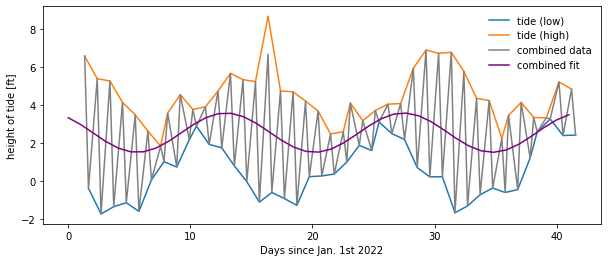

In [41]:
#plotting raw tide data.
#something screwy with dates lining up exactly. Maybe?

r = plt.figure(figsize=(10,4))
plt.plot(lowDay, low, label='tide (low)')
plt.plot(highDay, high, label='tide (high)')
plt.plot(day, height, label='combined data',color="grey")

plt.plot(x_fit2,simpleY_fit,label='combined fit', color = 'purple')

plt.xlabel('Days since Jan. 1st 2022')
plt.ylabel('height of tide [ft]')
plt.legend(loc=1,frameon=False)

This is the best I could do given the time, lack of team mates, or debugging. It's, close??, but far from accurate.

Plotting the "illegal" bet fit curves for high tide and low tide:

In [19]:
#plot size 

#oscillation chart size
x_fit = np.linspace(0, 41, 41)

#setting y_err "experimental error" as 0.25 feet. I hope.
y_err = np.full(len(low),0.25)

#low tide param suggestions:
lowParam = [-2.7,0.4,1.1,0.7]

#high tide param suggestions:
highParam = [-2.6,0.4,2.3,4.8]

In [20]:
lowY_fit = curveFit(lowDay,low, y_err, lowParam)
highY_fit = curveFit(highDay,high, y_err, highParam)

-1.8596109891105765 0.4278691934995209 0.041355196902190375 0.5080802260924734
1.5833010447122944 0.42707975949626414 1.3894389652225496 4.567932335612858


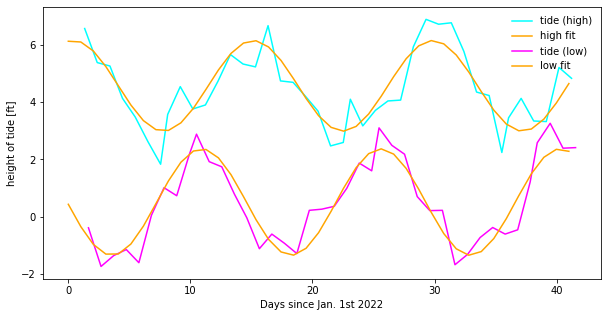

In [21]:
f = plt.figure(figsize=(10,5))

plt.plot(highDay, high, label='tide (high)', color = "cyan")
plt.plot(x_fit,highY_fit,label='high fit', color = 'orange')

plt.plot(lowDay, low, label='tide (low)', color = 'magenta')
plt.plot(x_fit,lowY_fit,label='low fit', color = 'orange')

plt.xlabel('Days since Jan. 1st 2022')
plt.ylabel('height of tide [ft]')
plt.legend(loc=0,frameon=False)

Alternative seperated "high tide/low tide" curves. My mistake.

Residuals attempt. Only using the "high tide" data which includes a potential tsunami spike.

In [35]:
idx_model = np.argsort(highDay)
y_highData = np.array(high)[idx_model] #np.array converts list to an NP array.
y_highModel = highY_fit

residuals = y_highData - y_highModel
#not using tensorflow so the .numpy() conversion is not needed
#residuals = residuals.numpy()
#print(residuals)

Plot residuals: "I've done something wrong here I think..."

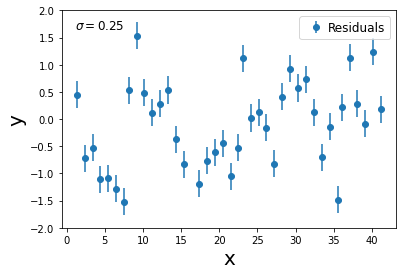

In [36]:
ax = plt.subplot(1,1,1)

ax.errorbar(highDay,residuals,y_err,fmt='o',label='Residuals')
#ax.set_xlim([0.9,8.1])
ax.set_ylim([-2.,2])
ax.text(1.1,1.65,r'$\sigma = 0.25$',color='0',fontsize=12)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.legend(frameon=True,fontsize=12,handletextpad=0)

Statistic properties of of the residuals:

In [24]:
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)
print(f"Mean residual is {residual_mean}.")
print(f"Root mean square (RMS) is {residual_std}.")

Mean residual is -0.09490364549406277.
Root mean square (RMS) is 0.7786231238833177.


In [25]:
#wacky gaussian function
def gaussian(x,mu,s):
    return 1./(2.*np.pi*s**2)**0.5 * np.exp(-0.5*((x-mu)/s)**2)

Histogram the residuals:

Mean residual is -0.09490364549406277.
Root mean square (RMS) is 0.7786231238833177.


Text(0, 0.5, 'N(x)')

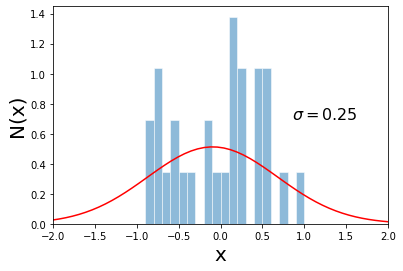

In [37]:
ax = plt.subplot(1,1,1)

print(f"Mean residual is {residual_mean}.")
print(f"Root mean square (RMS) is {residual_std}.")
ax.hist(residuals,bins=20,range=(-1,1),alpha=0.5,edgecolor="white",density=True)

x_g = np.linspace(-5*residual_std,5*residual_std,100)

ax.plot(x_g,gaussian(x_g,residual_mean,residual_std),color="red")

ax.set_xlim([-2,2])
#ax.set_ylim([-2,2])
ax.text(0.85,0.7,r'$\sigma = 0.25$',color='0',fontsize=16)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('N(x)',fontsize=20)

To my intial assesment: The mean residual has a very slight bias to the left, but the standard deviation falls at roughly 0.9. To me this could mean that the data is all over the palce or, my curve plot did a terrible job.

PART 4, OUTLIER

Time to make the tsunami happen, uh oh:

In [27]:
#current high tide data between Jan 13th to 17th

print(high)
print(f"\nJan 13th = {high[12]}")
print(f"Jan 14th = {high[13]}")
print(f"Jan 15th = {high[14]}")
print(f"Jan 16th = {high[15]}<<< spike?")
print(f"Jan 17th = {high[16]}")

[6.57, 5.38, 5.26, 4.13, 3.48, 2.62, 1.83, 3.57, 4.54, 3.76, 3.9, 4.73, 5.66, 5.33, 5.23, 6.67, 4.74, 4.69, 4.2, 3.68, 2.47, 2.59, 4.1, 3.17, 3.71, 4.04, 4.07, 5.93, 6.89, 6.72, 6.77, 5.77, 4.35, 4.23, 2.24, 3.45, 4.13, 3.34, 3.32, 5.21, 4.83]

Jan 13th = 5.66
Jan 14th = 5.33
Jan 15th = 5.23
Jan 16th = 6.67<<< spike?
Jan 17th = 4.74


According to the raw data, there was a significant spike on the 16th. According to the assignment instructions, the surges were detected as early as the 14th, but the data doesn't show that. According to other sources, the large surge from the Tonga Volcano occurred on the 15th GMT, and surges on the west coast were recorded also on the 15th PST time.

https://twitter.com/NWS_NTWC/status/1482460106851770371
https://en.wikipedia.org/wiki/2022_Hunga_Tonga%E2%80%93Hunga_Ha%27apai_eruption_and_tsunami

The eruption started at around 3 AM on the 15th, GMT, (while at GMT -7:00, "20:00" on the night of the 14th PST), but no tide surges were reported on the west coast until the 15th at the earliest.

Therefor, there's reasonable evidence to suggest that the two-foot high tide spike witnessed in Santa Cruz occurred either in the afternoon of the 15th, or in our case the 16th around 4 PM, considering errors.

_______

For the purpose of creating a +2-foot outlier for this assignment, I’ve increased the spike visible on the 16th from 6.67' feet to 8.67', assuming this is when the real 2 foot increase was actually seen.

In [28]:
#destroy the santa cruz bay again like in 2011

#confirming the old data is still accurate to what it should be:
high[15] = 6.67

highOutlier = high
print(highOutlier)

highOutlier[15] = high[15] + 2
print(f"\nJan 16th = {highOutlier[15]} <<< Outlier")

[6.57, 5.38, 5.26, 4.13, 3.48, 2.62, 1.83, 3.57, 4.54, 3.76, 3.9, 4.73, 5.66, 5.33, 5.23, 6.67, 4.74, 4.69, 4.2, 3.68, 2.47, 2.59, 4.1, 3.17, 3.71, 4.04, 4.07, 5.93, 6.89, 6.72, 6.77, 5.77, 4.35, 4.23, 2.24, 3.45, 4.13, 3.34, 3.32, 5.21, 4.83]

Jan 16th = 8.67 <<< Outlier


In [29]:
highOutlier_fit = curveFit(highDay,highOutlier, y_err, highParam)

idx_model = np.argsort(highDay)
y_highData = np.array(highOutlier)[idx_model] #np.array converts list to an NP array.
y_highModel = highOutlier_fit

outlierResiduals = y_highData - y_highModel
print(outlierResiduals)
#subtle increase to param D, from 4.56 to 4.62

1.6770340315294123 0.4272461474332469 1.3618448349385652 4.6232814204115265
[ 0.3061618  -0.87654382 -0.68099587 -1.24674925 -1.19029697 -1.33497122
 -1.53577891  0.55607882  1.57419415  0.52948604  0.14191414  0.28104966
  0.48728283 -0.46278631 -0.9621291   2.37462438 -1.34303965 -0.9051964
 -0.7239189  -0.51590062 -1.078544   -0.51402782  1.15375223  0.06501755
  0.1597269  -0.15807783 -0.85613332  0.33296992  0.80585348  0.42445323
  0.57866777 -0.02117182 -0.82058976 -0.21671153 -1.5161582   0.22073874
  1.16453546  0.32544433 -0.04726946  1.2529635   0.1574528 ]


Plot the new outlier graph w/ updated fit:

Text(17.5, 8.55, '<- outlier surge')

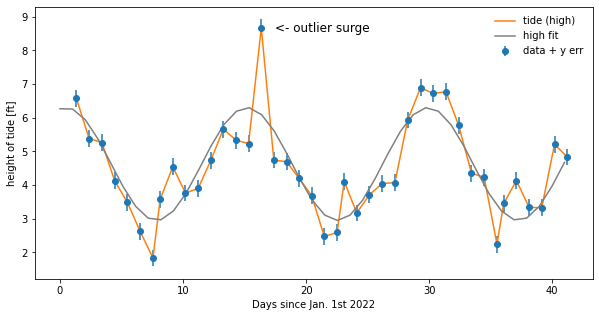

In [30]:
m = plt.figure(figsize=(10,5))

plt.errorbar(highDay, highOutlier, y_err,fmt='o',label='data + y err')
plt.plot(highDay, high, label='tide (high)')
plt.plot(x_fit,highOutlier_fit,label='high fit',color='grey')


plt.xlabel('Days since Jan. 1st 2022')
plt.ylabel('height of tide [ft]')
plt.legend(loc=0,frameon=False)
plt.text(17.5,8.55,r'<- outlier surge',color='0',fontsize=12)

Plot new residuals w/ new outlier

Text(17.4, 2.32, '<- outlier')

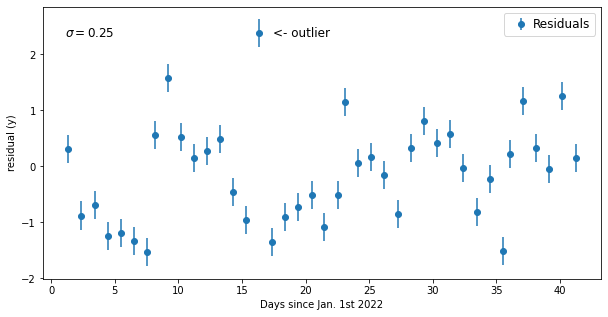

In [31]:
f = plt.figure(figsize=(10,5))

plt.errorbar(highDay,outlierResiduals,y_err,fmt='o',label='Residuals')
#ax.set_xlim([0.9,8.1])
#ax.set_ylim([-2.,2])

plt.xlabel('Days since Jan. 1st 2022')
plt.ylabel('residual (y)')
plt.legend(frameon=True,fontsize=12,handletextpad=0)

plt.text(1.1,2.32,r'$\sigma = 0.25$',color='0',fontsize=12)
plt.text(17.4,2.32,r'<- outlier',color='0',fontsize=12)

In [38]:
new_residual_mean = np.mean(outlierResiduals)
new_residual_std = np.std(outlierResiduals)
print(f"Mean residual is {new_residual_mean}.")
print(f"Root mean square (RMS) is {new_residual_std}.")

Mean residual is -0.10035665882874424.
Root mean square (RMS) is 0.8912854916609104.


Mean residual is -0.10035665882874424.
Root mean square (RMS) is 0.8912854916609104.


Text(0, 0.5, 'N(x)')

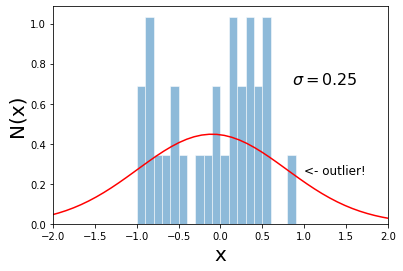

In [39]:
ax = plt.subplot(1,1,1) # <<<having issues getting the figsize() stick without errors.

#print(len(residuals))
print(f"Mean residual is {new_residual_mean}.")
print(f"Root mean square (RMS) is {new_residual_std}.")
ax.hist(outlierResiduals,bins=20,range=(-1,1),alpha=0.5,edgecolor="white",density=True)

x_g = np.linspace(-5*new_residual_std,5*new_residual_std,100)

ax.plot(x_g,gaussian(x_g,new_residual_mean,new_residual_std),color="red")

ax.set_xlim([-2,2])
#ax.set_ylim([-2,2])
ax.text(0.85,0.7,r'$\sigma = 0.25$',color='0',fontsize=16)
ax.text(1,0.25,r'<- outlier!',color='0',fontsize=12)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('N(x)',fontsize=20)

So there it is, a little outlier AKA the tsunami high tide surge. While the "standard deviation" line is marked at 0.89 - 0.1 for the mean residual, I can't say whether the outlier is falling outside of the regular standard deviation. If it is, it's very close to that line.

Anyway, nap time.

In [40]:
#reminders: 

#print out all images as PDF (SCREENSHOT WORKS BETTER)
#recolor everything with colors, omg they're so UGLY

#make everything UI pretty using "best practices" for histograms, and export.

#sleep more.